# Supervised Learning

The supervised learning is one type of machine learning, which the main goal is to learn a model from **labeled** training data that allows us to make predictions about unseen or future date. In this case, the term "supervised" refers to a set of training exemples (i.e., data inputs), where the desired output signals (i.e., labels) are already known.

Naming convention:
* Features = predictor variables = independent variables
* Target variable = dependend variable = response variable


## Exploratory Data Analysis

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris() #Load the data set.
print(type(iris)) #Checking out the type of iris.

<class 'sklearn.utils.Bunch'>


The iris type is a bunch, which is similar to a dictionary in that contains key-value pairs.

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(type(iris.data),type(iris.target)) #Checking the type of the data and the target dataset

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
iris.data.shape #Checking the number of rows and columns

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data
Y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


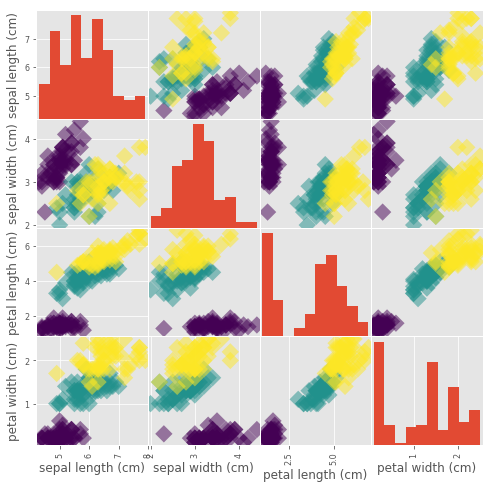

In [8]:
_ = pd.plotting.scatter_matrix(df, c=Y,figsize=[8,8],s=150,marker='D')

Looking at the graphic, it's possible to see that there is a high correlation between the petal length with the petal width. We will assign only these two features for the matrix, X.

In [9]:
X = iris.data[:, [2, 3]]

## The Classification Challenge

As an example of a supervised learning algorithm, we will use the **k-nearest neighbor (KNN)** classifier, which is a typical **lazy learner**. This means that it doesn't learn a discriminative function from the training data but memorized the training dataset instead.

**KNN** belongs to a subcategory of **nonparametric** models that are described as **instanced-based learning**. Models based on instanced-based learning are characterized by memorizing the training dataset, and lazy learning is a particular case of instanced-based learning that is associated with no cost during the learning process. The **KNN** algorithm itself is relatively straightforward and can be summarized by the following steps:
* 1. Choose the number of *k* and a distance metric.
* 2. Find the *k*-nearest neighbors of the data record that we want to classify.
* 3. Assign the class label by majority vote.

Note: **Nonparametric** models of machine learning algorithms are models that can't be characterized by a fixed set of parameters, and the number of parameters grows with the training data. In contrast, for **parametric** models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore.

To evaluate how well a trained model performs on unseen data, we will further split the dataset into separate training and test datasets. Using the *train_test_split* function from scikit-learn's *model_selection* module, we randomly split the X and Y arrays into 30 percent test data (45 examples) and 70 percent training data (105 examples).

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

For an optimal performance we will standardize the features of the data using the *StandardScaler* class from scikit-learn's *preprocessing* module.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

By executing the following code, we will now implement a KNN model in scikit-learn using a Euclidian distance metric.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

To visualize the decision boundaries for two-dimensional datasets

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',s=100, label='test set')

To specify the indices of the examples that we want to mark on the
resulting plots.

In [16]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((y_train, y_test))

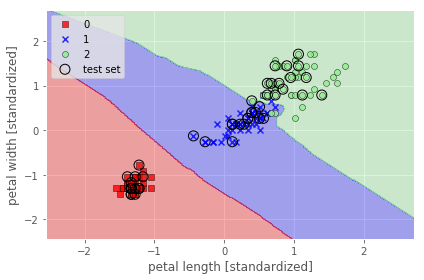

In [17]:
plot_decision_regions(X_combined_std, Y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()